In [1]:
%matplotlib inline
import math
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import chardet
import io
from sklearn import preprocessing
import numpy as np
from sklearn.preprocessing import FunctionTransformer
import numpy as np
from sklearn.preprocessing import power_transform
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from collections import defaultdict
from scipy.stats.stats import pearsonr
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
from sklearn.cluster import DBSCAN
from sklearn import datasets 
from sklearn.preprocessing import StandardScaler 
from sklearn.cluster import DBSCAN 
from sklearn.metrics import pairwise_distances 
from sklearn.neighbors import NearestNeighbors 
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn import metrics  
from scipy.stats import mode
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram

#### Reinserire percorso dataset!!!

In [2]:
df = pd.read_csv(r'C:\Users\Mario\Documents\UNIPI\DataMining1\Project\Train_HR_Employee_Attrition.csv')
#df = pd.read_csv(r'file:/Users/AlessandroVavala/Desktop/Alessandro/Università/UniPi/Data Mining/DatasetProject1/Train_HR_Employee_Attrition.csv')

## Preparativi

In [3]:
#MonthlyIncome
df['MonthlyIncome'] = df['MonthlyIncome'].fillna(df.groupby('JobRole')['MonthlyIncome'].transform('mean'))
#Age
df['Age'] = df['Age'].fillna(df.groupby('JobRole')['Age'].transform('mean'))
#Over18
df["Over18"].fillna("Y", inplace = True) 
#Gender
df["Gender"].fillna("Male", inplace = True)
#BusinessTravel
df["BusinessTravel"].fillna("Travel_Rarely", inplace = True)
#StandardHours
df["StandardHours"].fillna(float("80.0"), inplace = True)
#PerformanceRating
df['PerformanceRating'] = df.groupby(['JobRole'], sort=False)['PerformanceRating'].apply(lambda x: x.fillna(x.mode().iloc[0])) 
#TRAININGLASTYEAR
df['TrainingTimesLastYear'] = df['TrainingTimesLastYear'].fillna(df.groupby('JobRole')['TrainingTimesLastYear'].transform('mean'))
#YEARS AT COMPANY
df['YearsAtCompany'] = df['YearsAtCompany'].fillna(df.groupby('JobRole')['YearsAtCompany'].transform('mean'))
df.round({"Age" : 0 , "MonthlyIncome": 2 , "TrainingTimesLastYear" : 0 , "YearsAtCompany" : 0  })

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,52.0,No,Travel_Rarely,593,Research & Development,9,4,Medical,2,Male,...,3,80.0,0,20,2.0,2,8.0,7,2,13
1,36.0,No,Travel_Rarely,1218,Research & Development,1,1,Life Sciences,2,Male,...,3,80.0,1,21,3.0,3,1.0,8,1,6
2,37.0,No,Travel_Frequently,530,Sales,16,3,Life Sciences,3,Male,...,3,80.0,1,7,4.0,3,1.0,5,1,2
3,33.0,No,Travel_Rarely,953,Research & Development,5,4,Technical Degree,2,Male,...,2,80.0,0,12,1.0,3,3.0,7,0,7
4,37.0,No,Travel_Rarely,1380,Research & Development,9,2,Life Sciences,3,Female,...,3,80.0,0,2,3.0,3,10.0,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1171,37.0,No,Travel_Rarely,1123,Research & Development,16,2,Medical,4,Female,...,2,80.0,2,1,3.0,2,17.0,0,0,0
1172,33.0,Yes,Non-Travel,249,Sales,6,4,Life Sciences,2,Female,...,2,80.0,0,12,2.0,2,11.0,7,7,7
1173,33.0,No,Travel_Rarely,583,Sales,4,1,Marketing,3,Male,...,1,80.0,0,5,2.0,4,3.0,2,0,3
1174,45.0,No,Non-Travel,1174,Sales,3,4,Marketing,1,Male,...,4,80.0,0,15,2.0,3,10.0,4,0,1


In [4]:
#OUTLIERS FOR MonthlyIncome
"""SD MonthlyIncome"""
MonthlyIncome_std = df ['MonthlyIncome'].std()
MonthlyIncome_std
"""MEAN MonthlyIncome"""
MonthlyIncome_mean = df ['MonthlyIncome'].mean()
MonthlyIncome_mean
threshold = 3
outlier = [] 
for i in df ['MonthlyIncome']: 
    z = (i-MonthlyIncome_mean)/MonthlyIncome_std 
    if z >= threshold: 
        outlier.append(i)
        df = df[~df.MonthlyIncome.isin(outlier)]

#OUTLIERS FOR TotalWorkingYears
"""SD TotalWorkingYears"""
TotalWorkingYears_std = df ['TotalWorkingYears'].std()
"""MEAN TotalWorkingYears"""
TotalWorkingYears_mean = df ['TotalWorkingYears'].mean()
threshold = 3
outlier = [] 
for i in df ['TotalWorkingYears']: 
    z = (i-TotalWorkingYears_mean)/TotalWorkingYears_std 
    if z >= threshold: 
        outlier.append(i)
        df = df[~df.TotalWorkingYears.isin(outlier)]

#OUTLIERS FOR YearsAtCompany
"""SD YearsAtCompany"""
YearsAtCompany_std = df ['YearsAtCompany'].std()
"""MEAN YearsAtCompany"""
YearsAtCompany_mean = df ['YearsAtCompany'].mean()
threshold = 3
outlier = [] 
for i in df ['YearsAtCompany']: 
    z = (i-YearsAtCompany_mean)/YearsAtCompany_std 
    if z >= threshold: 
        outlier.append(i) 
        df = df[~df.YearsAtCompany.isin(outlier)]

#OUTLIERS FOR YearsInCurrentRole
"""SD YearsInCurrentRole"""
YearsInCurrentRole_std = df ['YearsInCurrentRole'].std()
"""MEAN YearsInCurrentRole"""
YearsInCurrentRole_mean = df ['YearsInCurrentRole'].mean()
threshold = 3
outlier = [] 
for i in df ['YearsInCurrentRole']: 
    z = (i-YearsInCurrentRole_mean)/YearsInCurrentRole_std 
    if z >= threshold: 
        outlier.append(i) 
        df = df[~df.YearsInCurrentRole.isin(outlier)]
 
#OUTLIERS FOR YearsSinceLastPromotion
"""SD YearsSinceLastPromotion"""
YearsSinceLastPromotion_std = df ['YearsSinceLastPromotion'].std()
"""MEAN YearsSinceLastPromotion"""
YearsSinceLastPromotion_mean = df ['YearsSinceLastPromotion'].mean()
threshold = 3
outlier = [] 
for i in df ['YearsSinceLastPromotion']: 
    z = (i-YearsSinceLastPromotion_mean)/YearsSinceLastPromotion_std 
    if z >= threshold: 
        outlier.append(i) 
        df = df[~df.YearsSinceLastPromotion.isin(outlier)]
 
#OUTLIERS FOR YearsWithCurrManager
"""SD YearsWithCurrManager"""
YearsWithCurrManager_std = df ['YearsWithCurrManager'].std()
"""MEAN YearsWithCurrManager"""
YearsWithCurrManager_mean = df ['YearsWithCurrManager'].mean()
threshold = 3
outlier = [] 
for i in df ['YearsWithCurrManager']: 
    z = (i-YearsWithCurrManager_mean)/YearsWithCurrManager_std 
    if z >= threshold: 
        outlier.append(i) 
        df = df[~df.YearsWithCurrManager.isin(outlier)]

In [5]:
print('Numero outlier rimossi: ', 1176 - len(df))
len(df)

Numero outlier rimossi:  97


1079

In [6]:
#Convertiamo Attrition 
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})
df['BusinessTravel'] = df['BusinessTravel'].map({'Non-Travel': 0, 'Travel_Rarely': 1, 'Travel_Frequently': 2})
df['OverTime'] = df['OverTime'].map({'Yes': 1, 'No':0})
# Encoding categorical variables
df = pd.get_dummies(df, columns=['MaritalStatus'])

In [7]:
#Prima creo un df solo con gli attributi numerici
num_df = df.select_dtypes(exclude=['object'])
 
#Codice per ZSCORE - STANDARDIZZAZIONE 
stand_data = StandardScaler().fit(num_df)
stand_data = stand_data.transform(num_df)
stand_data = pd.DataFrame(stand_data)
stand_data.columns = ['Age', 'Attrition' , 'BusinessTravel', 'DailyRate' , 'DistanceFromHome' , 'Education', 'EnvironmentSatisfaction' , 'HourlyRate', 'JobInvolvement' , 'JobLevel', 'JobSatisfaction', 'MonthlyIncome' , 'MonthlyRate' , 'NumCompaniesWorked' , 'OverTime' , 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction','StandardHours','StockOptionLevel','TotalWorkingYears','TrainingTimesLastYear','WorkLifeBalance', 'YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager', 'MaritalStatus_Divorced', 'MaritalStatus_Married', 'MaritalStatus_Single']
df = stand_data

#Errore! L'ultimo stand_data non è standardizzato. stand_data = pd.DataFrame(stand_data) è corretto

In [8]:
df = df.drop(columns = 'StandardHours')
df = df.drop(columns = 'HourlyRate')
df = df.drop(columns = 'DailyRate')
df = df.drop(columns = 'MonthlyRate')
df = df.drop(columns = 'BusinessTravel')
df = df.drop(columns = 'Education')
df = df.drop(columns = 'YearsInCurrentRole')
df = df.drop(columns = 'JobLevel')

# Hierachical Clustering

Per gli attributi utilizzati in K-Means utilizziamo l'euclidean distance

In [9]:
dk = df[['Age','MonthlyIncome','TotalWorkingYears','YearsWithCurrManager']]
dk_scaled = dk

dk_scaled.head(5)

,Age,MonthlyIncome,TotalWorkingYears,YearsWithCurrManager
0,1.884510,0.571577,1.438880,2.785567
1,-0.096870,-0.369970,1.585651,0.665729
2,-0.013352,-0.387174,-0.469153,-0.545606
3,-0.468378,-0.900438,0.264706,0.968563
4,0.078678,0.449583,-1.203011,-0.848440


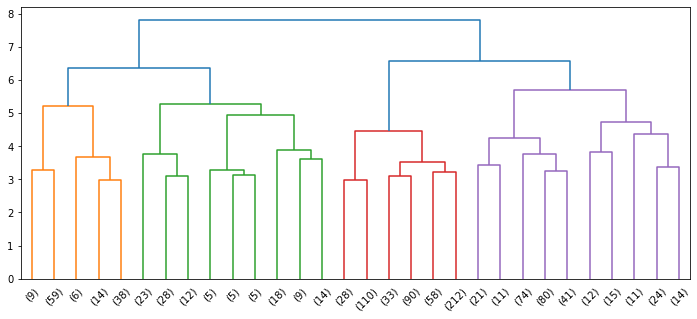

In [10]:
#Euclidean distance
fig = plt.figure(figsize=(12, 5))
data_dist = pdist(dk_scaled, metric='euclidean')
data_link = linkage(data_dist, method='complete', metric='euclidean')
res = dendrogram(data_link, color_threshold=6, truncate_mode='lastp')

Per gli attributi utilizzati in DBScan utilizziamo la cosine distance

In [11]:
dk = df[['MonthlyIncome','OverTime','JobInvolvement']]
dk_scaled = dk

dk_scaled.head(5)

,MonthlyIncome,OverTime,JobInvolvement
0,0.571577,-0.640670,0.364642
1,-0.369970,1.560867,0.364642
2,-0.387174,1.560867,0.364642
3,-0.900438,-0.640670,0.364642
4,0.449583,-0.640670,0.364642


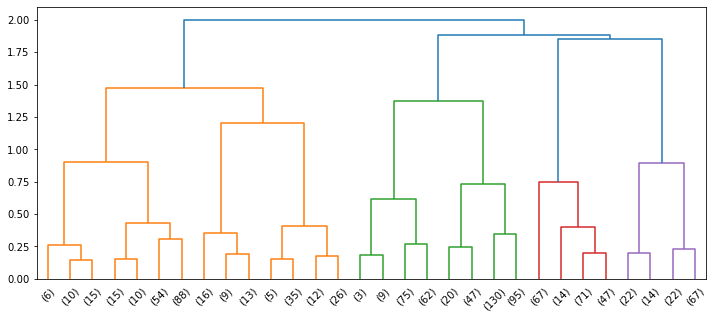

In [16]:
#Cosine distance
fig = plt.figure(figsize=(12, 5))
data_dist = pdist(dk_scaled, metric='cosine')
data_link = linkage(data_dist, method='complete', metric='cosine')
res = dendrogram(data_link, color_threshold=1.6, truncate_mode='lastp')